<a href="https://colab.research.google.com/github/yesimcebeci/movie-recommender/blob/main/EDA_and_Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MovieLens Recommender System 

- Student name: Yesim Cebeci
- Student pace: self paced
- Scheduled project review date/time: 01/04/2022
- Instructor name: Morgan Jones

## Overview

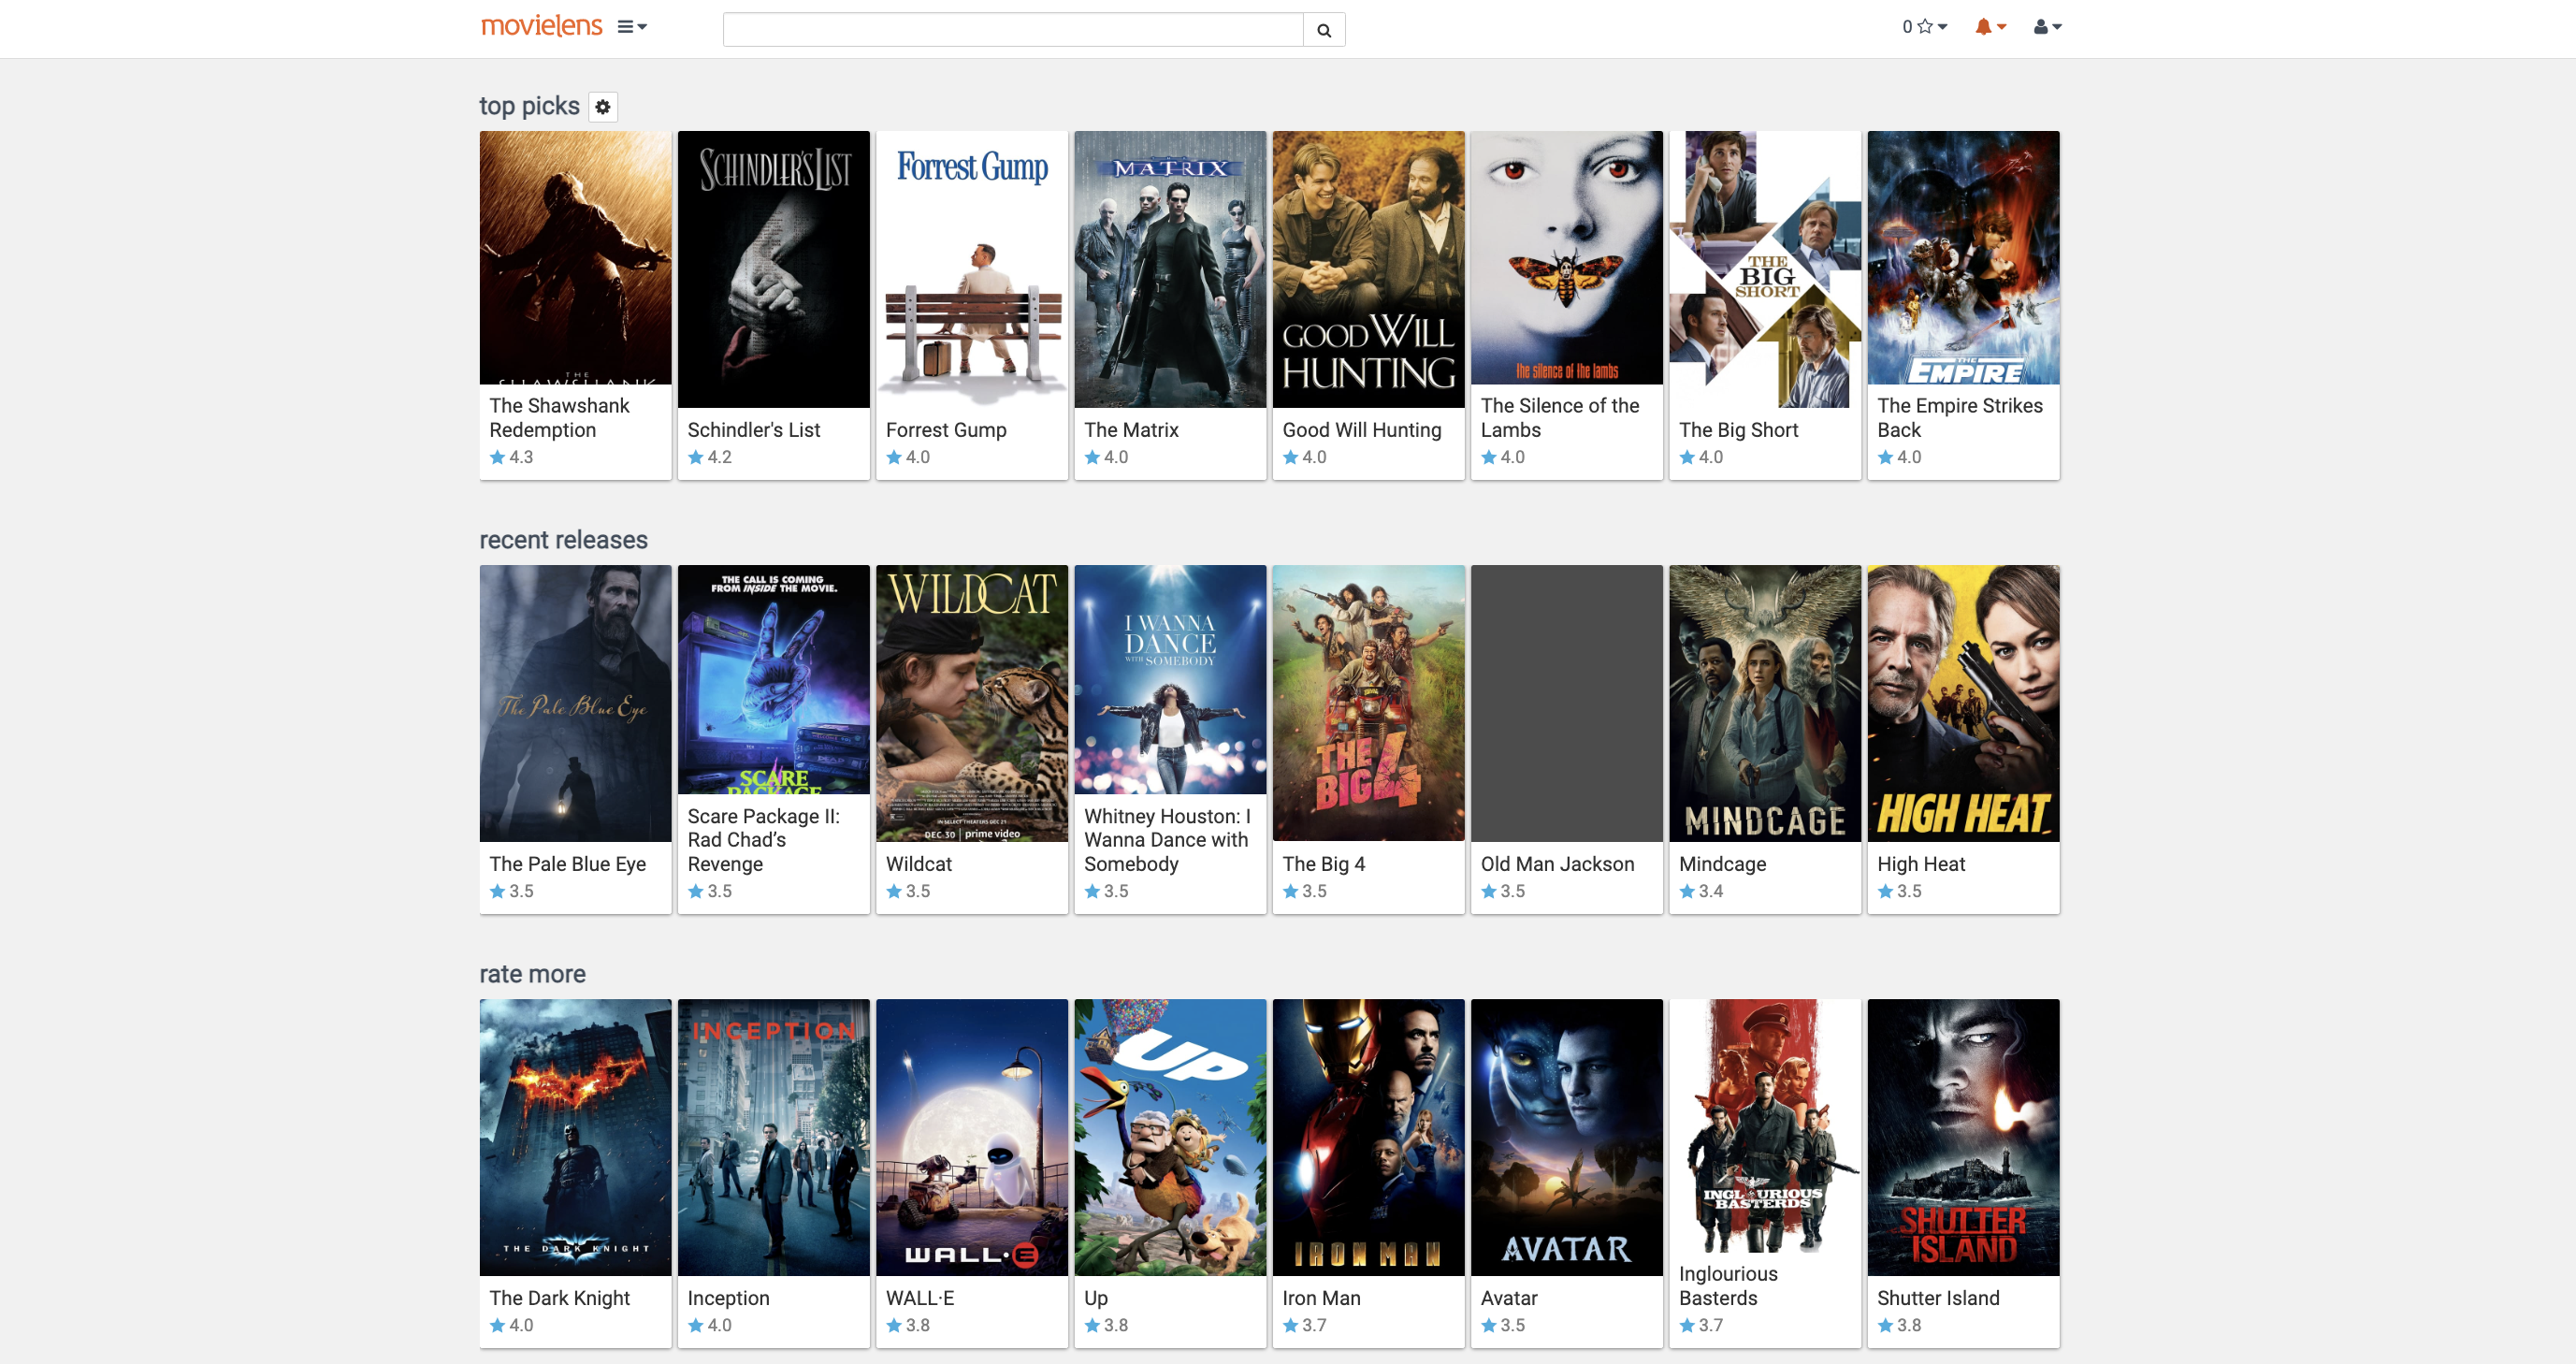

In this project ,I chose the MovieLens dataset and managed to create a movie recommendation system that somehow simulates some of the most successful recommendation engine products, such as Spotify, YouTube, and Netflix.

This notebook is going to explain how I worked throughout the entire life cycle of this project, and provide my solutions to some technical issues.



For the recommender system I will use Content-based, Collaborative and Model Based.Recommender systems are built on MovieLens dataset with 100,000 movie ratings. These Recommender systems were built using Pandas operations and by fitting Machine Learning models to suggest movies for the users based on similar users and for queries specific to genre, user, movie, rating.

## Business Understanding

MovieLens wants to improve it’s movie recommendation system that is located  on users’ homepages.

The goal is to use users movie ratings and recommend other movies.
This may save the user time when deciding which movie they would like to watch

## Data Understanding

https://grouplens.org/datasets/movielens/latest/

This dataset (ml-latest-small) describes 5-star rating and free-text tagging activity from MovieLens, a movie recommendation service. It contains 100836 ratings and 943 users informations across 9742 movies.

Users were selected at random for inclusion. All selected users had rated at least 20 movies.

The data are contained in the files  **u.user**,  **movies.csv** and  **ratings.csv**.

- **movies.csv**: Movie information is contained in the file movies.csv. Each line of this file after the header row represents one movie, and has the following format:

**movieId**: Unique id for each movie

**title**: Name of movies followed by their year of release

**genres**: categories that a movie might fall into separated by |

- **ratings.csv**: A table that records all the users’ rating behaviors, covering their rates and the time stamp when they posted the rates.

**userId**: Unique id for each user

**movieId**: Unique id for each movie

**rating**: Rating given by userId for movieId. Ratings are made on a 5-star scale with 0.5 increments.

**timestamp**: Time when rating was given


- **u.user**: A table that records each user’s unique ID , age , sex, occupation and zip code.



## Importing Libraries

In [ ]:
# importing necessary libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore')

## Loading Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "/content/drive/MyDrive/Project/ml-latest-small/movies.csv"
movie_df = pd.read_csv(path)
movie_df.head()

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy

In [ ]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [ ]:
path = "/content/drive/MyDrive/Project/ml-latest-small/ratings.csv"
rating_df = pd.read_csv(path)
rating_df.head()

userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931

In [ ]:
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [ ]:
# I will use this data only for EDA
u_cols = ['userId', 'age', 'sex', 'occupation', 'zip_code']
path = "/content/drive/MyDrive/Project/ml-latest-small/u.user"
users_df = pd.read_csv(path, sep='|', names=u_cols,
                       encoding='latin-1', parse_dates=True) 

users_df


userId  age sex     occupation zip_code
0         1   24   M     technician    85711
1         2   53   F          other    94043
2         3   23   M         writer    32067
3         4   24   M     technician    43537
4         5   33   F          other    15213
..      ...  ...  ..            ...      ...
938     939   26   F        student    33319
939     940   32   M  administrator    02215
940     941   20   M        student    97229
941     942   48   F      librarian    78209
942     943   22   M        student    77841

[943 rows x 5 columns]

In [ ]:
users_df['age'].value_counts()

30    39
25    38
22    37
28    36
27    35
      ..
7      1
66     1
11     1
10     1
73     1
Name: age, Length: 61, dtype: int64

In [ ]:
users_df['occupation'].value_counts()

student          196
other            105
educator          95
administrator     79
engineer          67
programmer        66
librarian         51
writer            45
executive         32
scientist         31
artist            28
technician        27
marketing         26
entertainment     18
healthcare        16
retired           14
lawyer            12
salesman          12
none               9
homemaker          7
doctor             7
Name: occupation, dtype: int64

In [ ]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   userId      943 non-null    int64 
 1   age         943 non-null    int64 
 2   sex         943 non-null    object
 3   occupation  943 non-null    object
 4   zip_code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


Some observation from dataset:
- Genres column has several genres , we need seperate them to do meaningful analysis 
- users_df  has **zip_code** columns we dont use this feature for the future analysis. it can be dropped.

## Exploratory Data Analysis and Data Cleaning

In [ ]:
# Merging ratings and movies data

merged_movies = pd.merge(movie_df, rating_df, on='movieId', how='inner')
merged_movies

movieId                                      title  \
0             1                           Toy Story (1995)   
1             1                           Toy Story (1995)   
2             1                           Toy Story (1995)   
3             1                           Toy Story (1995)   
4             1                           Toy Story (1995)   
...         ...                                        ...   
100831   193581  Black Butler: Book of the Atlantic (2017)   
100832   193583               No Game No Life: Zero (2017)   
100833   193585                               Flint (2017)   
100834   193587        Bungo Stray Dogs: Dead Apple (2018)   
100835   193609        Andrew Dice Clay: Dice Rules (1991)   

                                             genres  userId  rating  \
0       Adventure|Animation|Children|Comedy|Fantasy       1     4.0   
1       Adventure|Animation|Children|Comedy|Fantasy       5     4.0   
2       Adventure|Animation|Children|Comedy|Fantasy       7     4.5   
3       Adventure|Animation|Children|Comedy|Fantasy      15     2.5   
4       Adventure|Animation|Children|Comedy|Fantasy      17     4.5   
...                                             ...     ...     ...   
100831              Action|Animation|Comedy|Fantasy     184     4.0   
100832                     Animation|Comedy|Fantasy     184     3.5   
100833                                        Drama     184     3.5   
100834                             Action|Animation     184     3.5   
100835                                       Comedy     331     4.0   

         timestamp  
0        964982703  
1        847434962  
2       1106635946  
3       1510577970  
4       1305696483  
...            ...  
100831  1537109082  
100832  1537109545  
100833  1537109805  
100834  1537110021  
100835  1537157606  

[100836 rows x 6 columns]

In [ ]:
# Dropping the timestamp column
merged_movies = merged_movies.drop('timestamp', axis=1)


In [ ]:
merged_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   movieId  100836 non-null  int64  
 1   title    100836 non-null  object 
 2   genres   100836 non-null  object 
 3   userId   100836 non-null  int64  
 4   rating   100836 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.6+ MB


In [ ]:
merged_movies['userId'].value_counts()

414    2698
599    2478
474    2108
448    1864
274    1346
       ... 
53       20
207      20
431      20
442      20
189      20
Name: userId, Length: 610, dtype: int64

In [ ]:
df_merged =  pd.merge(merged_movies, users_df, on='userId')
df_merged = df_merged.drop('zip_code' , axis =1)
df_merged

movieId                                      title  \
0             1                           Toy Story (1995)   
1             3                    Grumpier Old Men (1995)   
2             6                                Heat (1995)   
3            47                Seven (a.k.a. Se7en) (1995)   
4            50                 Usual Suspects, The (1995)   
...         ...                                        ...   
100831   193579   Jon Stewart Has Left the Building (2015)   
100832   193581  Black Butler: Book of the Atlantic (2017)   
100833   193583               No Game No Life: Zero (2017)   
100834   193585                               Flint (2017)   
100835   193587        Bungo Stray Dogs: Dead Apple (2018)   

                                             genres  userId  rating  age sex  \
0       Adventure|Animation|Children|Comedy|Fantasy       1     4.0   24   M   
1                                    Comedy|Romance       1     4.0   24   M   
2                             Action|Crime|Thriller       1     4.0   24   M   
3                                  Mystery|Thriller       1     5.0   24   M   
4                            Crime|Mystery|Thriller       1     5.0   24   M   
...                                             ...     ...     ...  ...  ..   
100831                                  Documentary     184     3.5   37   M   
100832              Action|Animation|Comedy|Fantasy     184     4.0   37   M   
100833                     Animation|Comedy|Fantasy     184     3.5   37   M   
100834                                        Drama     184     3.5   37   M   
100835                             Action|Animation     184     3.5   37   M   

        occupation  
0       technician  
1       technician  
2       technician  
3       technician  
4       technician  
...            ...  
100831   librarian  
100832   librarian  
100833   librarian  
100834   librarian  
100835   librarian  

[100836 rows x 8 columns]

In [ ]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   movieId     100836 non-null  int64  
 1   title       100836 non-null  object 
 2   genres      100836 non-null  object 
 3   userId      100836 non-null  int64  
 4   rating      100836 non-null  float64
 5   age         100836 non-null  int64  
 6   sex         100836 non-null  object 
 7   occupation  100836 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 6.9+ MB


In [ ]:
df_merged.isna().sum()

movieId       0
title         0
genres        0
userId        0
rating        0
age           0
sex           0
occupation    0
dtype: int64

In [ ]:

# Extracting release year from movie title
df_merged['year'] = df_merged['title'].str.extract('.*\((.*)\).*',expand = False)
df_merged['year'].unique()

array(['1995', '1996', '1994', '1977', '1993', '1990', '1989', '1991',
       '1940', '1939', '1941', '1938', '1947', '1975', '1968', '1945',
       '1963', '1971', '1951', '1979', '1992', '1986', '1982', '1980',
       '1987', '1981', '1983', '1960', '1952', '1984', '1933', '1985',
       '1974', '1922', '1997', '1998', '1930', '1976', '1942', '1967',
       '1959', '1946', '1978', '1973', '1988', '1999', '1931', '1964',
       '1962', '1965', '1969', '2000', '1970', '1937', '1954', '2001',
       '2002', '2003', '2004', '2005', '2006', '1972', '1961', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '1966', '1944', '1957', '1949', '1955', '1936', '2017',
       '1958', '1935', '1943', '1927', '1953', '1926', '1950', '1956',
       '1923', '1902', '1920', '2018', '1948', '1928', '1934', '1916',
       '1908', '1932', '1925', '1921', '1915', '1924', '1929', '1903',
       '1919', nan, '1917', '2006–2007'], dtype=object)

In [ ]:
# Changing this to 2007
df_merged['year'] = df_merged['year'].replace("2006–2007","2007")
df_merged['year'].unique()

array(['1995', '1996', '1994', '1977', '1993', '1990', '1989', '1991',
       '1940', '1939', '1941', '1938', '1947', '1975', '1968', '1945',
       '1963', '1971', '1951', '1979', '1992', '1986', '1982', '1980',
       '1987', '1981', '1983', '1960', '1952', '1984', '1933', '1985',
       '1974', '1922', '1997', '1998', '1930', '1976', '1942', '1967',
       '1959', '1946', '1978', '1973', '1988', '1999', '1931', '1964',
       '1962', '1965', '1969', '2000', '1970', '1937', '1954', '2001',
       '2002', '2003', '2004', '2005', '2006', '1972', '1961', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '1966', '1944', '1957', '1949', '1955', '1936', '2017',
       '1958', '1935', '1943', '1927', '1953', '1926', '1950', '1956',
       '1923', '1902', '1920', '2018', '1948', '1928', '1934', '1916',
       '1908', '1932', '1925', '1921', '1915', '1924', '1929', '1903',
       '1919', nan, '1917'], dtype=object)

In [ ]:
# df_merged[df_merged['year'] == "nan"]
df_nan = df_merged[pd.isna(df_merged['year'])]
df_nan

movieId                                              title  \
33055    140956                                   Ready Player One   
37532    167570                                             The OA   
40842    143410                                         Hyena Road   
41839    162414                                          Moonlight   
48424    140956                                   Ready Player One   
49731     40697                                          Babylon 5   
52739    156605                                           Paterson   
58218    171495                                             Cosmos   
65159    176601                                       Black Mirror   
68319    140956                                   Ready Player One   
69329    171495                                             Cosmos   
75210    171631                            Maria Bamford: Old Baby   
75212    171891                                  Generation Iron 2   
77255    147250  The Adventures of Sherlock Holmes and Doctor W...   
97770     40697                                          Babylon 5   
99623    140956                                   Ready Player One   
100602   149334                                  Nocturnal Animals   

                        genres  userId  rating  age sex     occupation year  
33055   Action|Sci-Fi|Thriller     380     3.0   32   M       engineer  NaN  
37532       (no genres listed)     414     4.0   24   M     programmer  NaN  
40842       (no genres listed)     448     2.0   23   M  entertainment  NaN  
41839                    Drama     462     5.0   19   F        student  NaN  
48424   Action|Sci-Fi|Thriller     514     3.0   27   M     programmer  NaN  
49731                   Sci-Fi     528     0.5   18   M        student  NaN  
52739       (no genres listed)     567     4.5   24   M  entertainment  NaN  
58218       (no genres listed)     599     4.0   22   F        student  NaN  
65159       (no genres listed)      62     5.0   27   F  administrator  NaN  
68319   Action|Sci-Fi|Thriller     305     4.5   23   M     programmer  NaN  
69329       (no genres listed)     318     5.0   65   M        retired  NaN  
75210       (no genres listed)     111     1.0   57   M       engineer  NaN  
75212       (no genres listed)     111     3.5   57   M       engineer  NaN  
77255       (no genres listed)     105     5.0   24   M       engineer  NaN  
97770                   Sci-Fi     210     4.0   39   M       engineer  NaN  
99623   Action|Sci-Fi|Thriller     209     3.5   33   F       educator  NaN  
100602          Drama|Thriller     306     3.0   45   M          other  NaN

In [ ]:
df_merged = df_merged.dropna(subset=['year'],how='any')
df_merged['year'].unique()

array(['1995', '1996', '1994', '1977', '1993', '1990', '1989', '1991',
       '1940', '1939', '1941', '1938', '1947', '1975', '1968', '1945',
       '1963', '1971', '1951', '1979', '1992', '1986', '1982', '1980',
       '1987', '1981', '1983', '1960', '1952', '1984', '1933', '1985',
       '1974', '1922', '1997', '1998', '1930', '1976', '1942', '1967',
       '1959', '1946', '1978', '1973', '1988', '1999', '1931', '1964',
       '1962', '1965', '1969', '2000', '1970', '1937', '1954', '2001',
       '2002', '2003', '2004', '2005', '2006', '1972', '1961', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '1966', '1944', '1957', '1949', '1955', '1936', '2017',
       '1958', '1935', '1943', '1927', '1953', '1926', '1950', '1956',
       '1923', '1902', '1920', '2018', '1948', '1928', '1934', '1916',
       '1908', '1932', '1925', '1921', '1915', '1924', '1929', '1903',
       '1919', '1917'], dtype=object)

In [ ]:
df_merged['genres'] = df_merged['genres'].replace('(no genres listed)', np.nan)
print('Number of missing values in genres column:',df_merged['genres'].isna().sum())

# dropping rows with missing genres
df_merged= df_merged.dropna(subset=['genres'],how='any')
df_merged= df_merged.reset_index(drop=True)

df_merged.info()

Number of missing values in genres column: 38
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100781 entries, 0 to 100780
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   movieId     100781 non-null  int64  
 1   title       100781 non-null  object 
 2   genres      100781 non-null  object 
 3   userId      100781 non-null  int64  
 4   rating      100781 non-null  float64
 5   age         100781 non-null  int64  
 6   sex         100781 non-null  object 
 7   occupation  100781 non-null  object 
 8   year        100781 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 6.9+ MB


In [ ]:
df_merged.to_csv('df_merged.csv',index=False)

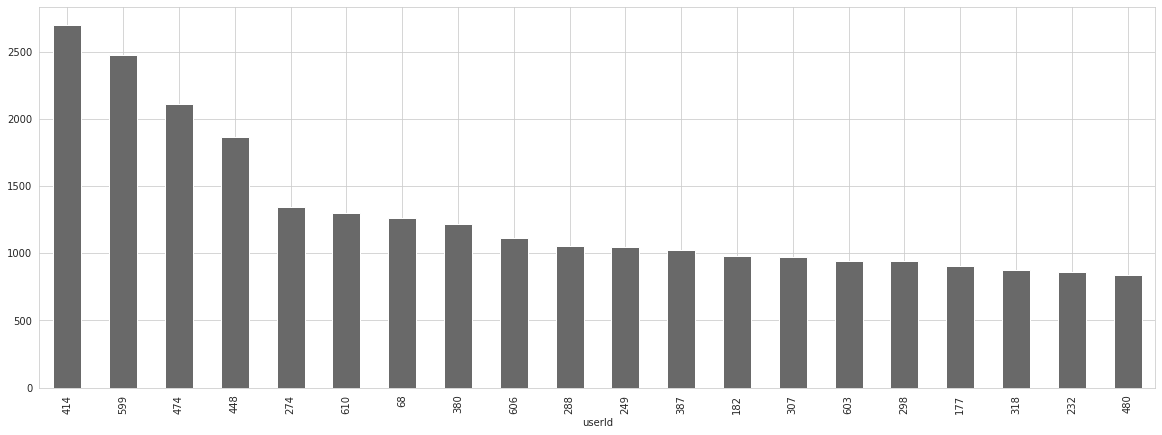

In [ ]:
#Grouping the rating based on user

ratings_by_users = df_merged.groupby('userId').agg({'rating': [np.size, np.mean]})
ratings_by_users['rating']['size'].sort_values(ascending = False).head(20).plot(kind = 'bar', figsize = (20,7), color = 'dimgray');

- ratings are not evenly distributed across users and users at most provided around 2,700 ratings

In [ ]:
user_414 = df_merged[df_merged['userId'] == 414]
user_414.head()


movieId                               title  \
34855        1                    Toy Story (1995)   
34856        2                      Jumanji (1995)   
34857        3             Grumpier Old Men (1995)   
34858        5  Father of the Bride Part II (1995)   
34859        6                         Heat (1995)   

                                            genres  userId  rating  age sex  \
34855  Adventure|Animation|Children|Comedy|Fantasy     414     4.0   24   M   
34856                   Adventure|Children|Fantasy     414     3.0   24   M   
34857                               Comedy|Romance     414     4.0   24   M   
34858                                       Comedy     414     2.0   24   M   
34859                        Action|Crime|Thriller     414     3.0   24   M   

       occupation  year  
34855  programmer  1995  
34856  programmer  1995  
34857  programmer  1995  
34858  programmer  1995  
34859  programmer  1995

In [ ]:
# Grouping the ratings based on movies
ratings_by_movies = df_merged.groupby('title').agg({'rating': [np.size, np.mean]})
ratings_by_movies


rating          
                                            size      mean
title                                                     
'71 (2014)                                     1  4.000000
'Hellboy': The Seeds of Creation (2004)        1  4.000000
'Round Midnight (1986)                         2  3.500000
'Salem's Lot (2004)                            1  5.000000
'Til There Was You (1997)                      2  4.000000
...                                          ...       ...
eXistenZ (1999)                               22  3.863636
xXx (2002)                                    24  2.770833
xXx: State of the Union (2005)                 5  2.000000
¡Three Amigos! (1986)                         26  3.134615
À nous la liberté (Freedom for Us) (1931)      1  1.000000

[9681 rows x 2 columns]

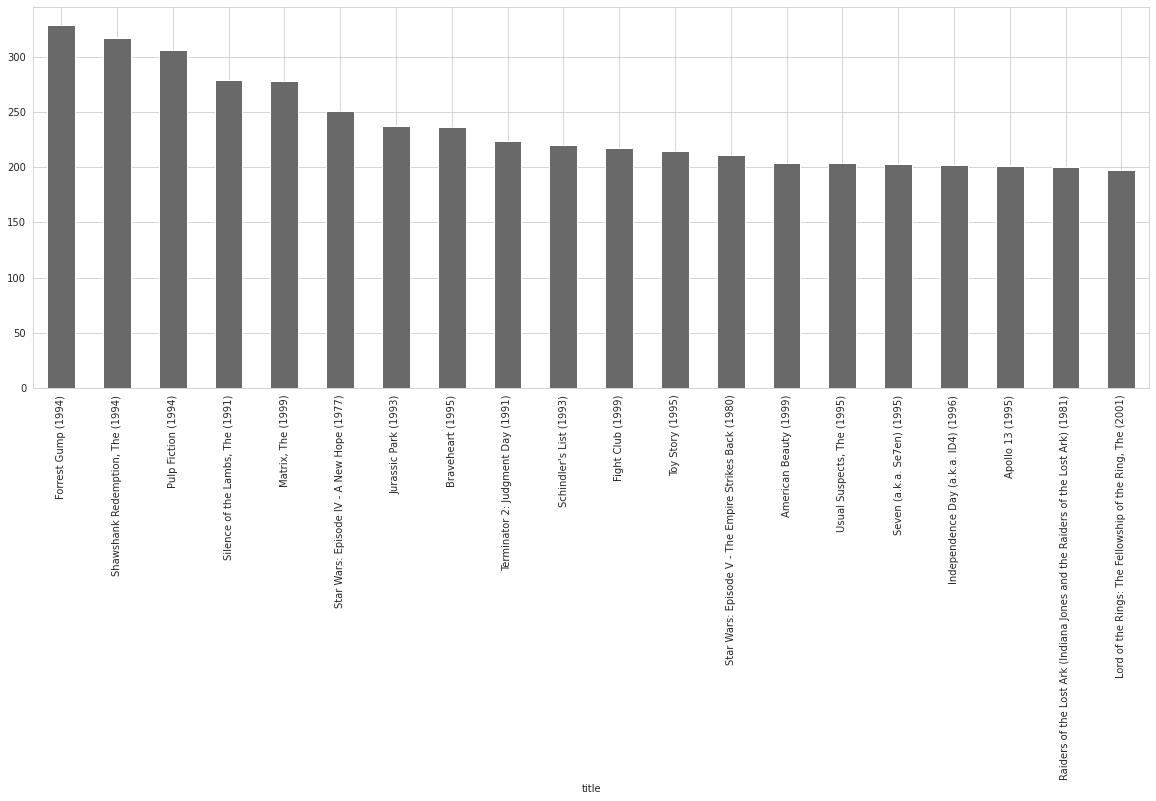

In [ ]:
# Most rated movies 
ratings_by_movies['rating']['size'].sort_values(ascending = False).head(20).plot(kind = 'bar', figsize = (20,7), color = 'dimgrey');

- ratings are not evenly distributed among movies and the most rated movies is “Forrest Gump” which has no more than 350 ratings

In [ ]:
# We can consider high average rated movies as popular movies 
pop_ratings_by_movies = ratings_by_movies[ratings_by_movies['rating']['size']>200]
pop_ratings_by_movies['rating']['mean'].sort_values( ascending=False).head(10)

title
Shawshank Redemption, The (1994)                         4.429022
Fight Club (1999)                                        4.272936
Usual Suspects, The (1995)                               4.237745
Star Wars: Episode IV - A New Hope (1977)                4.231076
Schindler's List (1993)                                  4.225000
Star Wars: Episode V - The Empire Strikes Back (1980)    4.215640
Pulp Fiction (1994)                                      4.197068
Matrix, The (1999)                                       4.192446
Forrest Gump (1994)                                      4.164134
Silence of the Lambs, The (1991)                         4.161290
Name: mean, dtype: float64

- **ratings_by_users** and **ratings_by_movies** tables  would allow us to understand which movie is well loved or reviewed in our database. I will make use of this information in the following sections.

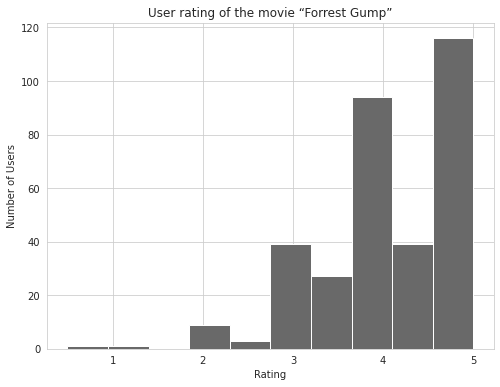

In [ ]:
# User rating of the movie “Forrest Gump”
plt.figure(figsize=(8,6))
movies_grouped = df_merged.groupby('title')
Forrest_Gump = movies_grouped.get_group('Forrest Gump (1994)')
Forrest_Gump['rating'].hist(color = 'dimgray')
plt.title('User rating of the movie “Forrest Gump”')
plt.xlabel('Rating')
plt.ylabel('Number of Users')

plt.show()


In [ ]:
# Checking duplicates if there is any
df_merged.duplicated().sum()

0

## Visual Representations of Data

In [ ]:
genre_popularity = (movie_df.genres.str.split('|')
                      .explode()
                      .value_counts()
                      .sort_values(ascending=False))
genre_popularity.head(10)

Drama        4361
Comedy       3756
Thriller     1894
Action       1828
Romance      1596
Adventure    1263
Crime        1199
Sci-Fi        980
Horror        978
Fantasy       779
Name: genres, dtype: int64

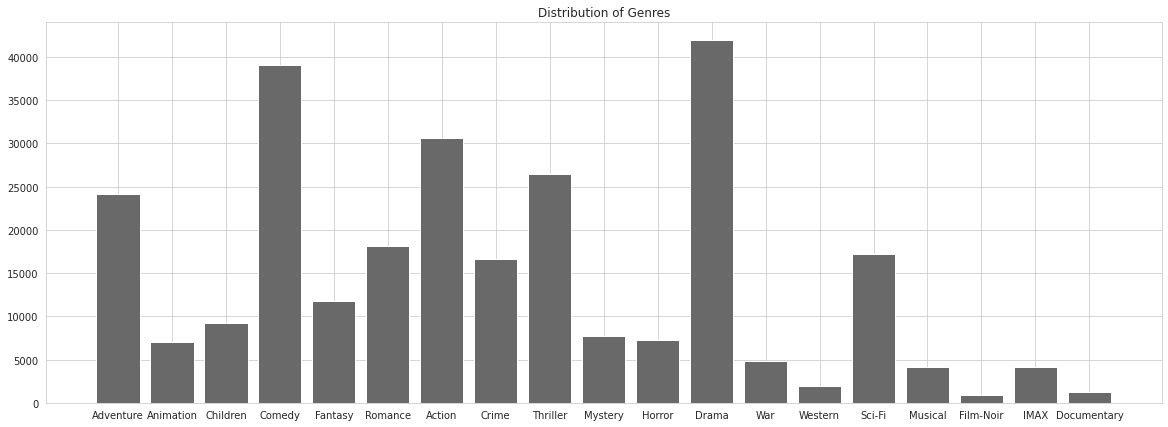

In [ ]:
# Distribution of Genres

plt.figure(figsize=(20,7))
genres = df_merged['genres'].apply(lambda genres_movie : str(genres_movie).split("|"))

genres_count = {}
for genres_movie in genres:
    for genre in genres_movie:
        if(genres_count.get(genre,False)):
            genres_count[genre]=genres_count[genre]+1
        else:
            genres_count[genre] = 1       
plt.bar(genres_count.keys(),genres_count.values(),color='dimgray');
plt.title('Distribution of Genres');


- We can see that most of the movies belong to movie genre : **Drama** followed by **Comedy** then **Action**, **Thriller** and **Adventure**

In [ ]:
df_merged.rating.mean()

3.501577678332225

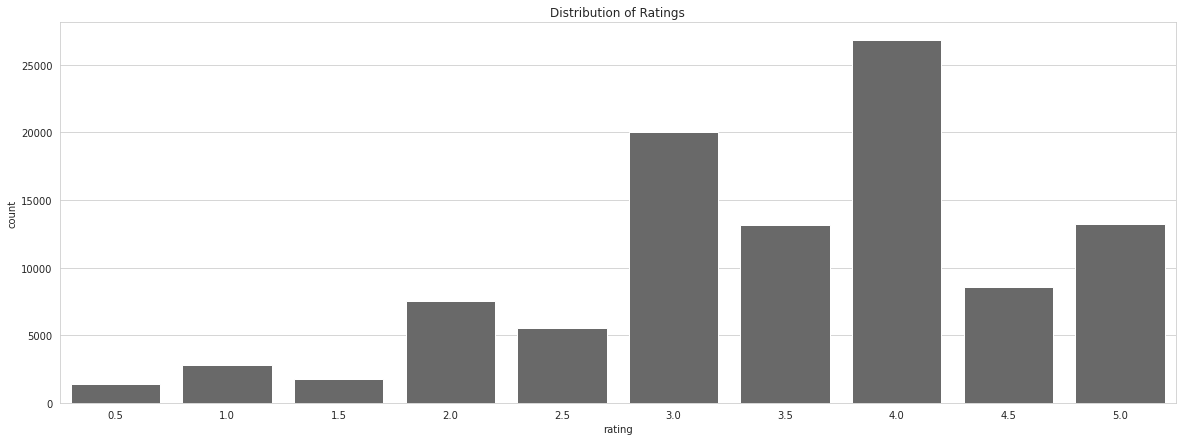

In [ ]:
# Distribution of Ratings
plt.figure(figsize=(20,7))
sns.countplot(df_merged['rating'], color = 'dimgray')
plt.title('Distribution of Ratings');

- most people are likely to give a rating around 4

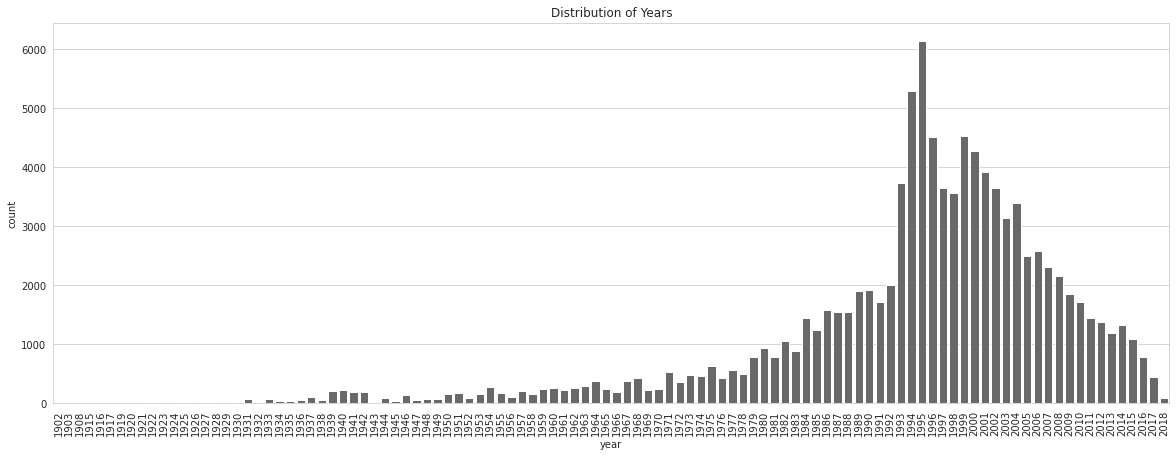

In [ ]:
# Distribution of Year
df_year_asc = df_merged.sort_values('year' , ascending = True)
plt.figure(figsize=(20,7))
sns.countplot(df_year_asc['year'], color = 'dimgray')
plt.xticks(rotation=90)
plt.title('Distribution of Years');

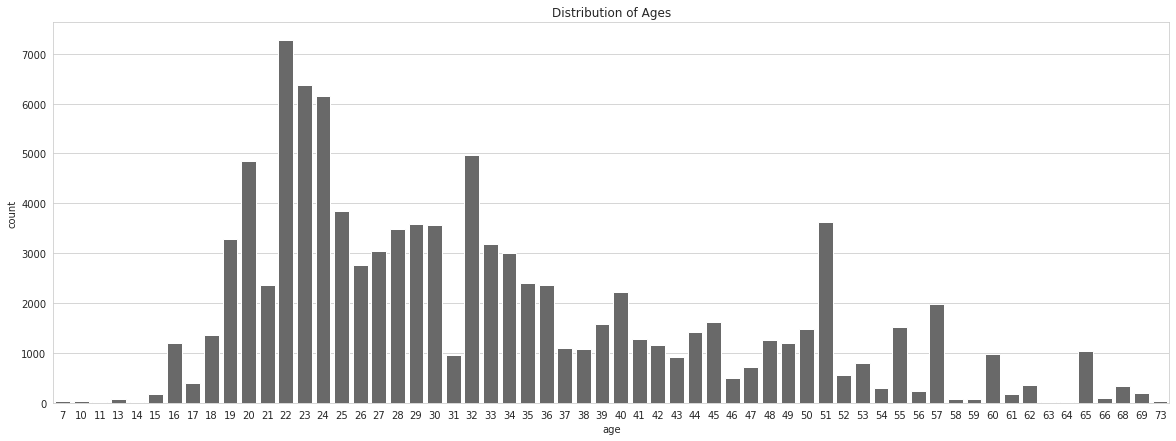

In [ ]:
# Distribution of Ages
plt.figure(figsize=(20,7))
sns.countplot(df_merged['age'], color = 'dimgray')
plt.title('Distribution of Ages');

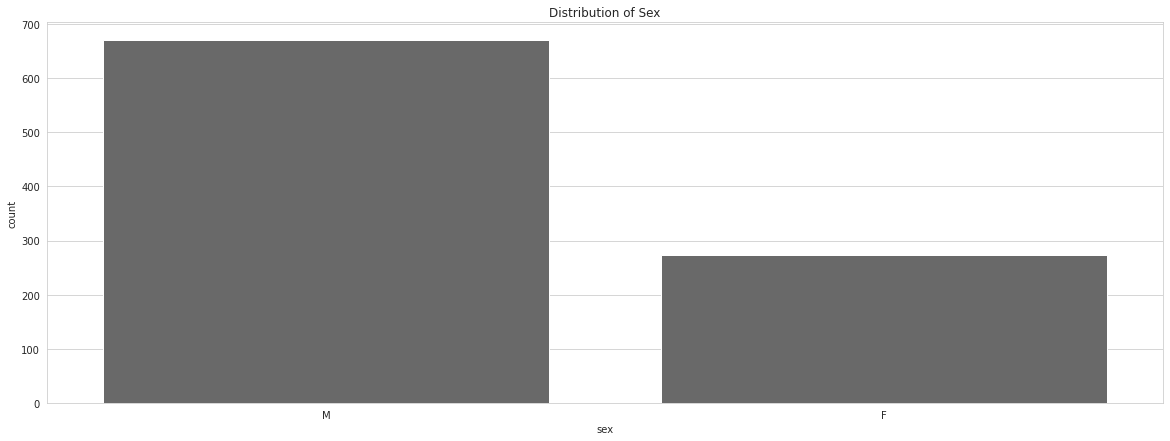

In [ ]:
# Distribution of Sex
plt.figure(figsize=(20,7))
sns.countplot(users_df['sex'], color = 'dimgray')
plt.title('Distribution of Sex');


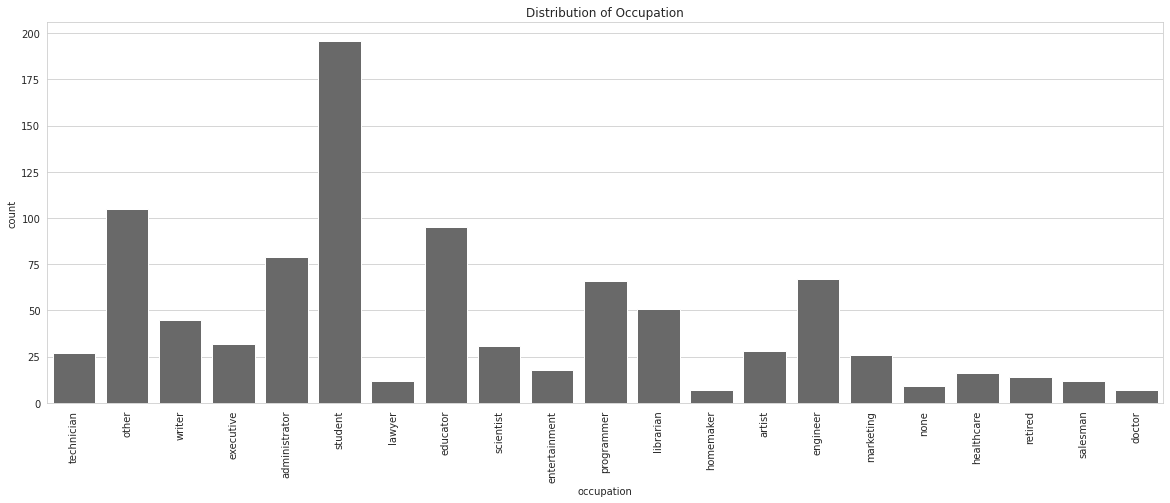

In [ ]:
# Distribution of Sex
plt.figure(figsize=(20,7))
sns.countplot(users_df['occupation'], color = 'dimgray')
plt.title('Distribution of Occupation')
plt.xticks(rotation=90);

